In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%%R

# My commonly used R imports

require('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: tidyverse


In [15]:
%%R
#open weather_waterlevel_yearly.csv as an R dataframe
df <- read.csv('2023_subway_censusvar_agg.csv')



In [22]:
%%R
#show me the names of the columns in the dataframe
names(df)

 [1] "GEOID"                 "Common.Name"          

 "Equipment.Description"
 [4] "Station.MRN"           "Station.ID"            "Complex.ID"           
 [7] "GTFS.Stop.ID"          "Division"              "Line"                 
[10] "Stop.Name"             "Borough"               "Daytime.Routes"       
[13] "Structure"             "lat"                   "long"                 
[16] "North.Direction.Label" "South.Direction.Label" "ADA"                  
[19] "ADA.Notes"             "Georeference"          "STATE"                
[22] "COUNTY"                "TRACT"                 "BLOCK"                
[25] "NAME"                  "geometry"              "population_estimate"  
[28] "sub_pop_estimate"      "amb_pop_estimate"      "med_earn_estimate"    
[31] "population_moe"        "sub_pop_moe"           "amb_pop_moe"          
[34] "med_earn_moe"          "outage_count"         


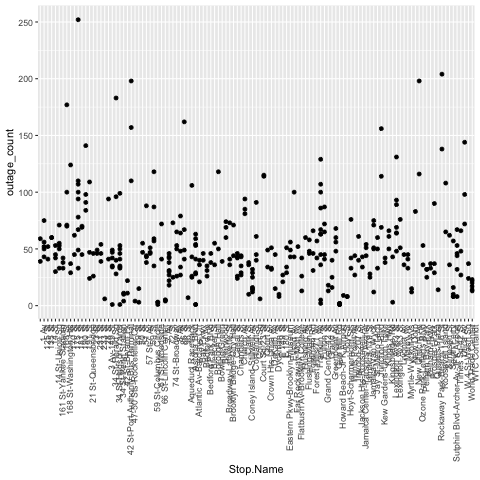

In [24]:
%%R
#plot the Common.Name column against outage_count, place labels on the outliers

df %>%
  ggplot(aes(x = Stop.Name, y = outage_count)) +
  geom_point() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

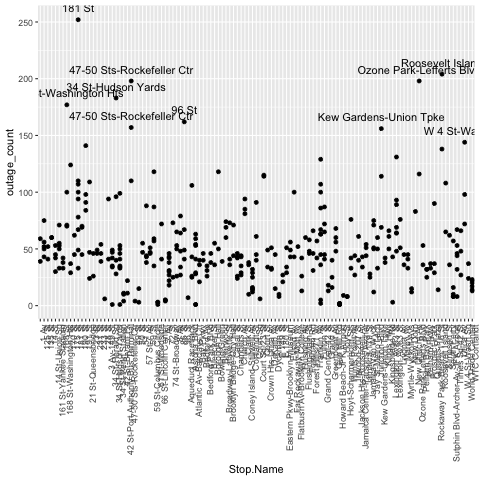

In [26]:
%%R
library(ggplot2)
library(dplyr)

# Assuming df is your dataframe

# First, create a new dataframe that contains only the top 10 Stop.Name by outage_count
top_stops <- df %>%
  arrange(desc(outage_count)) %>%
  slice(1:10)

# Then, plot using ggplot2
ggplot(df, aes(x = Stop.Name, y = outage_count)) +
  geom_point() +  # Plot all points
  geom_text(data = top_stops, aes(label = Stop.Name), vjust = -1) +  # Label top 10
  theme(axis.text.x = element_text(angle = 90, hjust = 1))


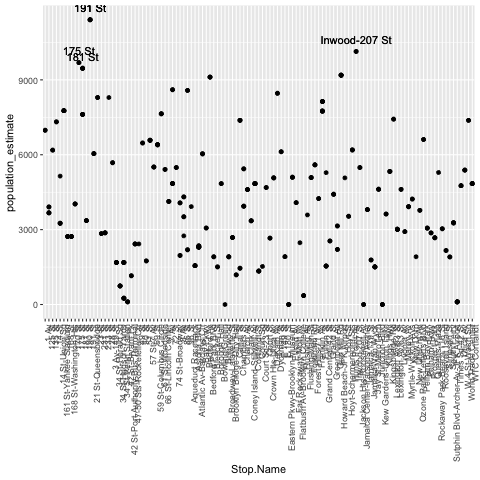

In [28]:
%%R

#create a new dataframe that contains only the top 10 Stop.Name by population_estimate
top_pop <- df %>%
  arrange(desc(population_estimate)) %>%
  slice(1:10)

#plot the relationship between the Stop.Name and population_estimate
df %>%
  ggplot(aes(x = Stop.Name, y = population_estimate)) +
  geom_point() +
  geom_text(data = top_pop, aes(label = Stop.Name), vjust = -1) +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))


In [4]:
%%R
ggplot(df, aes(x=outage_count, y=population_estimate+amb_pop_estimate+med_earn_estimate)) +
     geom_point() +
     labs(subtitle="Plotting the outages against population and disabled population") +
     theme(
        plot.title = element_text(size=20, face="bold"),
    ) +
    geom_smooth(method = 'lm')

Error in `ggplot()`:
! `data` cannot be a function.
ℹ Have you misspelled the `data` argument in `ggplot()`
Run `rlang::last_trace()` to see where the error occurred.

Error in ggplot(df, aes(x = outage_count, y = population_estimate + amb_pop_estimate +  : 
  
ℹ Have you misspelled the `data` argument in `ggplot()`


RInterpreterError: Failed to parse and evaluate line 'ggplot(df, aes(x=outage_count, y=population_estimate+amb_pop_estimate+med_earn_estimate)) +\n     geom_point() +\n     labs(subtitle="Plotting the outages against population and disabled population") +\n     theme(\n        plot.title = element_text(size=20, face="bold"),\n    ) +\n    geom_smooth(method = \'lm\')\n'.
R error message: 'Error in ggplot(df, aes(x = outage_count, y = population_estimate + amb_pop_estimate +  : \n  \nℹ Have you misspelled the `data` argument in `ggplot()`'

Using dataframe with regression variables for analysis


In [5]:
%%R
#read csv file
df <- read.csv('elevator_final.csv')

In [6]:
%%R 

model <- lm(outage_count ~ population_estimate+amb_pop_estimate, data = df)
summary(model)


Call:
lm(formula = outage_count ~ population_estimate + amb_pop_estimate, 
    data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-53.029 -19.479  -9.132   9.714 186.700 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)

    
(Intercept)         51.962813   3.811357  13.634   <2e-16 ***
population_estimate -0.005406   0.011172  -0.484    0.629    
amb_pop_estimate     0.007046   0.011714   0.601    0.548    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 34.51 on 302 degrees of freedom
Multiple R-squared:  0.01022,	Adjusted R-squared:  0.00366 
F-statistic: 1.558 on 2 and 302 DF,  p-value: 0.2122



`geom_smooth()` using formula = 'y ~ x'


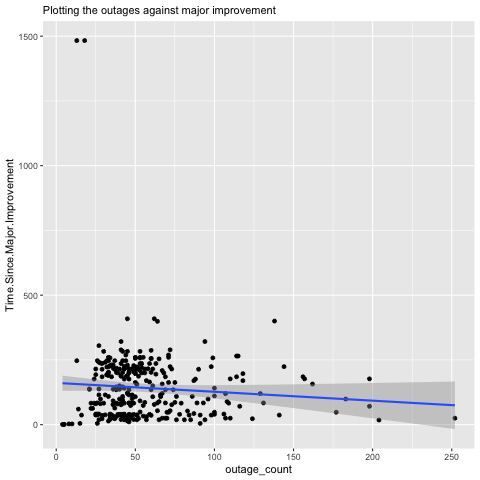

In [7]:
%%R
ggplot(df, aes(x=outage_count, y=Time.Since.Major.Improvement)) +
     geom_point() +
     labs(subtitle="Plotting the outages against major improvement") +
     theme(
        plot.title = element_text(size=20, face="bold"),
    ) +
    geom_smooth(method = 'lm')

`geom_smooth()` using formula = 'y ~ x'


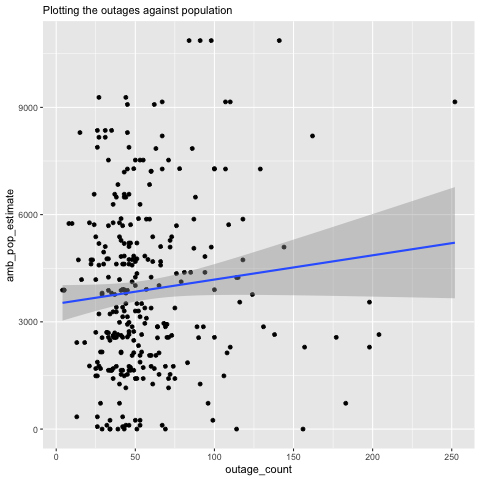

In [12]:
%%R
ggplot(df, aes(x=outage_count, y=amb_pop_estimate)) +
     geom_point() +
     labs(subtitle="Plotting the outages against population") +
     theme(
        plot.title = element_text(size=20, face="bold"),
    ) +
    geom_smooth(method = 'lm')

In [11]:
%%R 

model <- lm(outage_count ~ amb_pop_estimate+Time.Since.Major.Improvement+Ridership, data = df)
summary(model)


Call:
lm(formula = outage_count ~ amb_pop_estimate + Time.Since.Major.Improvement + 
    Ridership, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-51.406 -15.522  -5.473   9.247 179.704 



Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   4.220e+01  7.821e+00   5.395 3.49e-07 ***
amb_pop_estimate              3.363e-03  1.176e-03   2.860   0.0050 ** 
Time.Since.Major.Improvement -2.809e-02  1.441e-02  -1.949   0.0536 .  
Ridership                     2.964e-05  4.607e-04   0.064   0.9488    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 31.05 on 120 degrees of freedom
  (181 observations deleted due to missingness)
Multiple R-squared:  0.1124,	Adjusted R-squared:  0.09022 
F-statistic: 5.066 on 3 and 120 DF,  p-value: 0.002444

